# Log 0.7
1. Using loaded features and labels, instead of extracting features every time.
2. Added more dense and dropout layers  before the output layer
3. Poor results, but little overtraining, accuracy a(t) ~ 0.35, a(v) ~ 0.5 and loss l(t) ~ 1.6, l(v) ~ 1.6
4. Idea: train for many for epochs, maybe 100


In [1]:
# load features and labels
import keras
#keras.__version__ 2.4.3
import numpy as np

train_features = np.load("saved_train_features.npy");
validation_features = np.load("saved_validation_features.npy");
test_features = np.load("saved_test_features.npy");
train_labels = np.load("saved_train_labels.npy");
validation_labels = np.load("saved_validation_labels.npy");
test_labels = np.load("saved_test_labels.npy");


In [2]:
# build network and print summary
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [3]:
# train and save model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('trash-classifier-0-7.h7')

Epoch 1/30
58/58 [==============================] - 3s 53ms/step - loss: 2.3640 - acc: 0.2086 - val_loss: 2.2423 - val_acc: 0.2554
Epoch 2/30
58/58 [==============================] - 3s 49ms/step - loss: 2.2537 - acc: 0.1974 - val_loss: 2.1901 - val_acc: 0.2609
Epoch 3/30
58/58 [==============================] - 3s 56ms/step - loss: 2.1967 - acc: 0.2181 - val_loss: 2.1542 - val_acc: 0.2978
Epoch 4/30
58/58 [==============================] - 4s 65ms/step - loss: 2.1798 - acc: 0.2086 - val_loss: 2.1252 - val_acc: 0.3641
Epoch 5/30
58/58 [==============================] - 4s 65ms/step - loss: 2.1329 - acc: 0.2069 - val_loss: 2.0604 - val_acc: 0.3880
Epoch 6/30
58/58 [==============================] - 3s 52ms/step - loss: 2.0946 - acc: 0.2353 - val_loss: 2.0340 - val_acc: 0.3772
Epoch 7/30
58/58 [==============================] - 3s 59ms/step - loss: 2.0604 - acc: 0.2595 - val_loss: 1.9969 - val_acc: 0.4000
Epoch 8/30
58/58 [==============================] - 3s 51ms/step - loss: 2.0438 - a

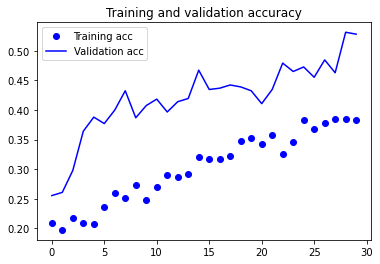

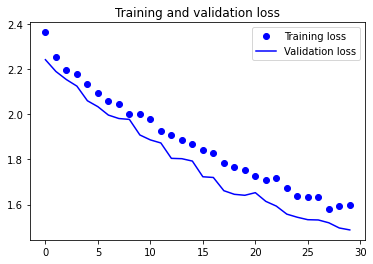

In [4]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()